<a href="https://colab.research.google.com/github/mewerton/AI_Autoencoders_Artificial_Neural/blob/main/Mewerton_Autoencoders_Pratica_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Tarefa 1 - Autoencoders - Prática - Bloco 6**

Aluno: Mewerton de Melo Silva

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.layers import Dense, Input, Activation, Dropout
from keras.models import Model
from keras.models import Sequential
from keras.optimizers import Adam

In [14]:
# Carregando o conjunto de dados MNIST
(x_train, y_train), (x_test, y_test) = (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#yn = y_train.to_numpy()
print(y_train.max())

# Normalizando os valores dos pixels para o intervalo [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Transformando as imagens em vetores unidimensionais (784 pixels)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Aplicação de ruído nos dados e armazenando e variáveis acessórias
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

#print(len(x_train))
#print(x_train.shape[1:])
#print(np.prod(x_train.shape[1:]))
print(x_train.shape)
print(x_test.shape)

#print(x_train.view)
print(y_train)

9
(60000, 784)
(10000, 784)
[9 0 0 ... 3 0 5]


In [15]:
# Definindo a dimensão da representação codificada
n_latent = 120

# Criando o modelo do autoencoder
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation="relu"))
model.add(Dense(300, activation="relu"))
model.add(Dense(n_latent, activation="relu"))
model.add(Dense(300, activation="relu"))
model.add(Dense(784, activation="sigmoid"))

# Compilando o modelo
model.compile(optimizer='adam', loss='binary_crossentropy')

In [16]:
# Treinando o autoencoder
model.fit(x_train, x_train, epochs=30, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Codificando e decodificando as imagens de teste sem ruído
encoded_imgs = model.predict(x_test)

Epoch 1/30
235/235 [==============================] - 12s 45ms/step - loss: 0.3553 - val_loss: 0.3081
Epoch 2/30
235/235 [==============================] - 7s 30ms/step - loss: 0.2992 - val_loss: 0.2959
Epoch 3/30
235/235 [==============================] - 7s 29ms/step - loss: 0.2904 - val_loss: 0.2894
Epoch 4/30
235/235 [==============================] - 6s 25ms/step - loss: 0.2853 - val_loss: 0.2854
Epoch 5/30
235/235 [==============================] - 7s 29ms/step - loss: 0.2819 - val_loss: 0.2826
Epoch 6/30
235/235 [==============================] - 6s 25ms/step - loss: 0.2795 - val_loss: 0.2806
Epoch 7/30
235/235 [==============================] - 7s 29ms/step - loss: 0.2775 - val_loss: 0.2791
Epoch 8/30
235/235 [==============================] - 5s 21ms/step - loss: 0.2759 - val_loss: 0.2776
Epoch 9/30
235/235 [==============================] - 6s 25ms/step - loss: 0.2747 - val_loss: 0.2766
Epoch 10/30
235/235 [==============================] - 5s 21ms/step - loss: 0.2736 - val_l

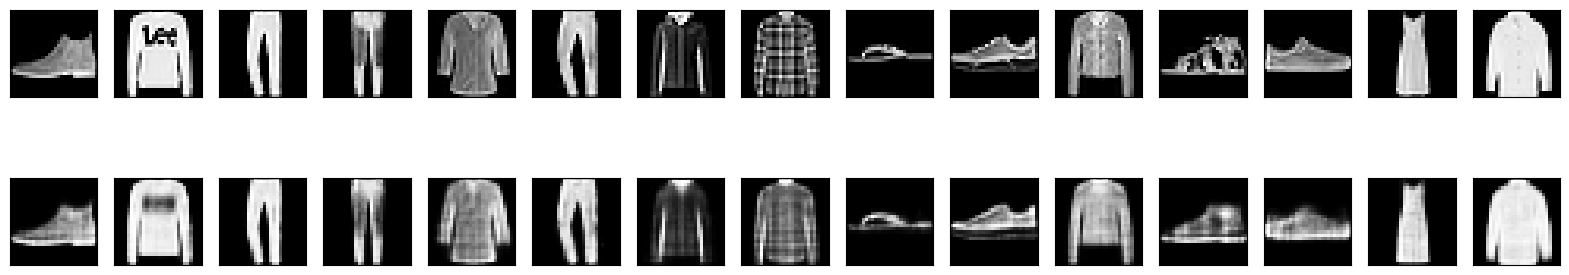

In [17]:
# Visualizando algumas imagens originais sem ruído e reconstruídas
n = 15
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagem original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagem reconstruída
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [18]:
# Codificando e decodificando as imagens de teste com ruído
encoded_imgs = model.predict(x_test_noisy)

313/313 [==============================] - 1s 3ms/step


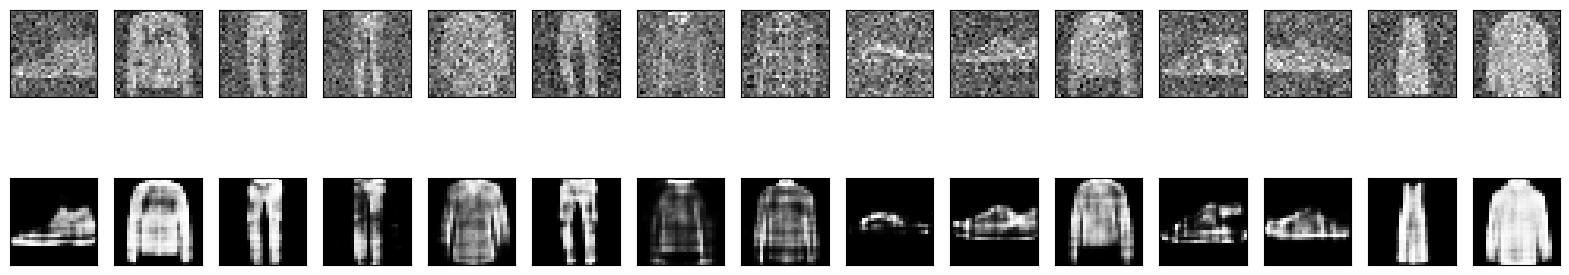

In [19]:
# Visualizando algumas imagens originais com ruído e reconstruídas
n = 15
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagem original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagem reconstruída
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [22]:
batch_size = 128
hidden_units = 256
dropout = 0.45
input_size = x_train.shape[1]
num_labels = len(np.unique(y_train))

# model is a 3-layer MLP with ReLU and dropout after each layer
model2 = Sequential()
model2.add(Dense(hidden_units, input_dim=input_size))
model2.add(Activation('relu'))
model2.add(Dropout(dropout))
model2.add(Dense(hidden_units))
model2.add(Activation('relu'))
model2.add(Dropout(dropout))
model2.add(Dense(num_labels))
model2.add(Activation('softmax'))
# Dropout é aplicado após a primeira e a segunda camada densa, proporcionando regularização e ajudando a reduzir o overfitting durante o treinamento

model2.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),  # Alterando a taxa de aprendizagem para melhorar a acurácia
              metrics=['accuracy'])

In [23]:
model2.fit(x_train, y_train, epochs=50, batch_size=batch_size)

Epoch 1/50
469/469 [==============================] - 6s 11ms/step - loss: 1.1000 - accuracy: 0.6132
Epoch 2/50
469/469 [==============================] - 6s 12ms/step - loss: 0.6664 - accuracy: 0.7667
Epoch 3/50
469/469 [==============================] - 5s 10ms/step - loss: 0.5741 - accuracy: 0.8000
Epoch 4/50
469/469 [==============================] - 6s 13ms/step - loss: 0.5179 - accuracy: 0.8190
Epoch 5/50
469/469 [==============================] - 5s 10ms/step - loss: 0.4846 - accuracy: 0.8302
Epoch 6/50
469/469 [==============================] - 5s 12ms/step - loss: 0.4607 - accuracy: 0.8379
Epoch 7/50
469/469 [==============================] - 6s 13ms/step - loss: 0.4410 - accuracy: 0.8436
Epoch 8/50
469/469 [==============================] - 5s 12ms/step - loss: 0.4232 - accuracy: 0.8497
Epoch 9/50
469/469 [==============================] - 6s 12ms/step - loss: 0.4100 - accuracy: 0.8541
Epoch 10/50
469/469 [==============================] - 5s 10ms/step - loss: 0.4017 - accura

In [25]:
loss, acc = model2.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTeste de Acurácia Classificação sem Ruído: %.1f%%" % (100.0 * acc))
loss, acc = model2.evaluate(x_test_noisy, y_test, batch_size=batch_size)
print("\nTeste de Acurácia Classificação com Ruído: %.1f%%" % (100.0 * acc))
loss, acc = model2.evaluate(encoded_imgs, y_test, batch_size=batch_size)
print("\nTeste de Acurácia Classificação das Imagens Recuperadas do Ruído: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 1s 12ms/step - loss: 0.3029 - accuracy: 0.8920

Teste de Acurácia Classificação sem Ruído: 89.2%
79/79 [==============================] - 1s 8ms/step - loss: 0.7793 - accuracy: 0.7809

Teste de Acurácia Classificação com Ruído: 78.1%
79/79 [==============================] - 0s 4ms/step - loss: 0.5928 - accuracy: 0.7982

Teste de Acurácia Classificação das Imagens Recuperadas do Ruído: 79.8%


**ALTERAÇÕES REALIZADAS PARA MELHORIA:**

1° Adição da importação from keras.optimizers import Adam para utilizar o otimizador Adam.

2° Adição de Dropout após as camadas densas.

3° Alteração do otimizador para Adam com uma taxa de aprendizagem de 0.0001.

Essas alterações são recomendadas para tentar melhorar a acurácia do modelo. O Dropout pode ajudar a reduzir o overfitting, enquanto o uso do otimizador Adam com uma taxa de aprendizagem menor pode melhorar a convergência do modelo e potencialmente aumentar a acurácia. Essas alterações não são estritamente necessárias, mas são comuns em práticas recomendadas para treinamento de redes neurais.

**RESULTADOS:**

Os resultados após os ajustes parecem ser melhores em comparação com os resultados anteriores. A acurácia da classificação sem ruído permaneceu próxima, enquanto a acurácia da classificação com ruído e das imagens recuperadas do ruído melhoraram. A adição de camadas de Dropout e a alteração do otimizador para Adam com uma taxa de aprendizagem menor ajudaram a regularizar o modelo e a melhorar a generalização, o que pode ter contribuído para esses resultados mais positivos.

